In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Load the dataset
uber_data = pd.read_csv('UberDataset.csv')
uber_data

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [5]:
# Display basic information about the dataset
print(uber_data.info())
print(uber_data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB
None
         START_DATE          END_DATE  CATEGORY        START             STOP  \
0  01-01-2016 21:11  01-01-2016 21:17  Business  Fort Pierce      Fort Pierce   
1  01-02-2016 01:25  01-02-2016 01:37  Business  Fort Pierce      Fort Pierce   
2  01-02-2016 20:25  01-02-2016 20:38  Business  Fort Pierce      Fort Pierce   
3  01-05-2016 17:31  01-05-2016 17:45  Business  Fort Pierce      Fort Pierce   
4  01-06-2016 14:42  01-06-2016 15:49  Business  Fort Pierce  

In [6]:
# Check for missing values
print(uber_data.isnull().sum())

START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64


In [7]:
# Display unique values in categorical columns
print(uber_data['PURPOSE'].unique())
print(uber_data['CATEGORY'].unique())
print(uber_data['START'].unique())
print(uber_data['STOP'].unique())

['Meal/Entertain' nan 'Errand/Supplies' 'Meeting' 'Customer Visit'
 'Temporary Site' 'Between Offices' 'Charity ($)' 'Commute' 'Moving'
 'Airport/Travel']
['Business' 'Personal' nan]
['Fort Pierce' 'West Palm Beach' 'Cary' 'Jamaica' 'New York' 'Elmhurst'
 'Midtown' 'East Harlem' 'Flatiron District' 'Midtown East'
 'Hudson Square' 'Lower Manhattan' "Hell's Kitchen" 'Downtown' 'Gulfton'
 'Houston' 'Eagan Park' 'Morrisville' 'Durham' 'Farmington Woods'
 'Whitebridge' 'Lake Wellingborough' 'Fayetteville Street' 'Raleigh'
 'Hazelwood' 'Fairmont' 'Meredith Townes' 'Apex' 'Chapel Hill'
 'Northwoods' 'Edgehill Farms' 'Tanglewood' 'Preston' 'Eastgate'
 'East Elmhurst' 'Jackson Heights' 'Long Island City' 'Katunayaka'
 'Unknown Location' 'Colombo' 'Nugegoda' 'Islamabad' 'R?walpindi'
 'Noorpur Shahan' 'Heritage Pines' 'Westpark Place' 'Waverly Place'
 'Wayne Ridge' 'Weston' 'East Austin' 'West University' 'South Congress'
 'The Drag' 'Congress Ave District' 'Red River District' 'Georgian Acres'
 

In [8]:
# Convert dates to datetime
uber_data['START-DATE'] = pd.to_datetime(uber_data['START_DATE'], errors='coerce')
uber_data['END-DATE'] = pd.to_datetime(uber_data['END_DATE'], errors='coerce')
uber_data

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,START-DATE,END-DATE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01 21:11:00,2016-01-01 21:17:00
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN,2016-01-02 01:25:00,2016-01-02 01:37:00
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02 20:25:00,2016-01-02 20:38:00
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05 17:31:00,2016-01-05 17:45:00
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06 14:42:00,2016-01-06 15:49:00
...,...,...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site,NaT,NaT
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting,NaT,NaT
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site,NaT,NaT
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site,NaT,NaT


In [9]:
# Extract additional features from dates
uber_data['Start Hour'] = uber_data['START-DATE'].dt.hour
uber_data['End Hour'] = uber_data['END-DATE'].dt.hour
uber_data['Day of Week'] = uber_data['START-DATE'].dt.dayofweek
uber_data

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,START-DATE,END-DATE,Start Hour,End Hour,Day of Week
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01 21:11:00,2016-01-01 21:17:00,21.0,21.0,4.0
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN,2016-01-02 01:25:00,2016-01-02 01:37:00,1.0,1.0,5.0
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02 20:25:00,2016-01-02 20:38:00,20.0,20.0,5.0
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05 17:31:00,2016-01-05 17:45:00,17.0,17.0,1.0
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06 14:42:00,2016-01-06 15:49:00,14.0,15.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site,NaT,NaT,NaN,NaN,NaN
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting,NaT,NaT,NaN,NaN,NaN
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site,NaT,NaT,NaN,NaN,NaN
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site,NaT,NaT,NaN,NaN,NaN


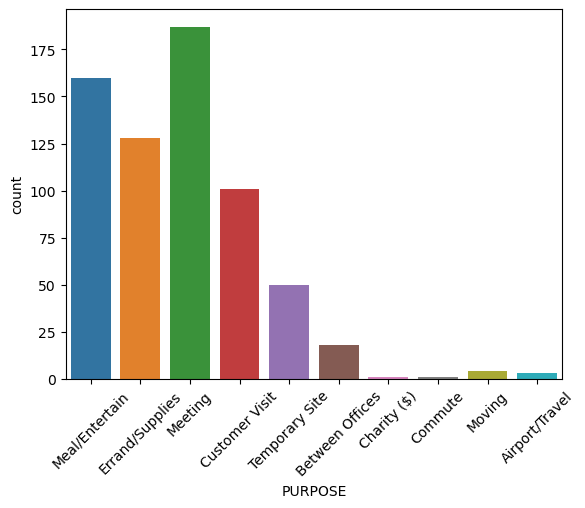

In [10]:
# Visualize trip purposes
sns.countplot(data=uber_data, x='PURPOSE')
plt.xticks(rotation=45)
plt.show()

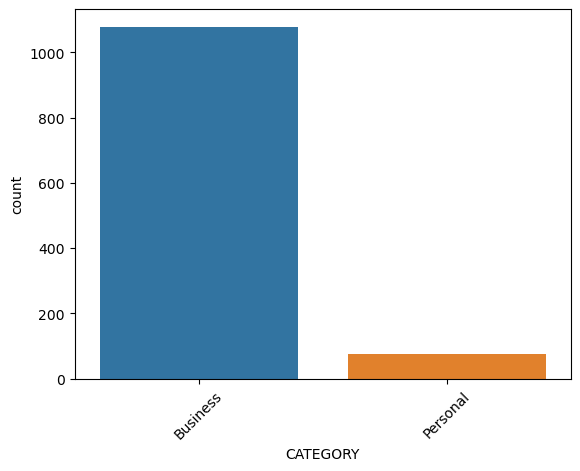

In [11]:
# Visualize trip categories
sns.countplot(data=uber_data, x='CATEGORY')
plt.xticks(rotation=45)
plt.show()

In [12]:
from sklearn.preprocessing import LabelEncoder

# Drop rows with missing dates
uber_data = uber_data.dropna(subset=['START-DATE', 'END-DATE'])
uber_data

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,START-DATE,END-DATE,Start Hour,End Hour,Day of Week
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01 21:11:00,2016-01-01 21:17:00,21.0,21.0,4.0
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN,2016-01-02 01:25:00,2016-01-02 01:37:00,1.0,1.0,5.0
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02 20:25:00,2016-01-02 20:38:00,20.0,20.0,5.0
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05 17:31:00,2016-01-05 17:45:00,17.0,17.0,1.0
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06 14:42:00,2016-01-06 15:49:00,14.0,15.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1043,12-12-2016 13:22,12-12-2016 13:32,Business,Cary,Cary,3.1,Errand/Supplies,2016-12-12 13:22:00,2016-12-12 13:32:00,13.0,13.0,0.0
1044,12-12-2016 13:36,12-12-2016 13:51,Business,Cary,Apex,4.4,Meal/Entertain,2016-12-12 13:36:00,2016-12-12 13:51:00,13.0,13.0,0.0
1045,12-12-2016 14:26,12-12-2016 14:39,Business,Apex,Cary,4.7,Customer Visit,2016-12-12 14:26:00,2016-12-12 14:39:00,14.0,14.0,0.0
1046,12-12-2016 17:51,12-12-2016 18:01,Business,Cary,Morrisville,3.0,Meal/Entertain,2016-12-12 17:51:00,2016-12-12 18:01:00,17.0,18.0,0.0


In [13]:
# Fill missing values in other columns if any
uber_data = uber_data.fillna(method='ffill')

In [14]:
uber_data

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,START-DATE,END-DATE,Start Hour,End Hour,Day of Week
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01 21:11:00,2016-01-01 21:17:00,21.0,21.0,4.0
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain,2016-01-02 01:25:00,2016-01-02 01:37:00,1.0,1.0,5.0
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02 20:25:00,2016-01-02 20:38:00,20.0,20.0,5.0
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05 17:31:00,2016-01-05 17:45:00,17.0,17.0,1.0
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06 14:42:00,2016-01-06 15:49:00,14.0,15.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1043,12-12-2016 13:22,12-12-2016 13:32,Business,Cary,Cary,3.1,Errand/Supplies,2016-12-12 13:22:00,2016-12-12 13:32:00,13.0,13.0,0.0
1044,12-12-2016 13:36,12-12-2016 13:51,Business,Cary,Apex,4.4,Meal/Entertain,2016-12-12 13:36:00,2016-12-12 13:51:00,13.0,13.0,0.0
1045,12-12-2016 14:26,12-12-2016 14:39,Business,Apex,Cary,4.7,Customer Visit,2016-12-12 14:26:00,2016-12-12 14:39:00,14.0,14.0,0.0
1046,12-12-2016 17:51,12-12-2016 18:01,Business,Cary,Morrisville,3.0,Meal/Entertain,2016-12-12 17:51:00,2016-12-12 18:01:00,17.0,18.0,0.0


In [15]:
# Encode categorical variables
label_encoders = {}
for column in ['PURPOSE', 'CATEGORY', 'START', 'STOP']:
    le = LabelEncoder()
    uber_data[column] = le.fit_transform(uber_data[column])
    label_encoders[column] = le
    
# Define features and target variable
X = uber_data[['MILES', 'CATEGORY', 'START', 
               'STOP','Start Hour','End Hour','Day of Week']]
X
y = uber_data['PURPOSE']
y

0       3
1       3
2       2
3       4
4       1
       ..
1043    2
1044    3
1045    1
1046    3
1047    1
Name: PURPOSE, Length: 420, dtype: int32

In [16]:
# Define features and target variable
X = uber_data[['MILES', 'CATEGORY', 'START', 
               'STOP','Start Hour','End Hour','Day of Week']]
X
y = uber_data['PURPOSE']
y

0       3
1       3
2       2
3       4
4       1
       ..
1043    2
1044    3
1045    1
1046    3
1047    1
Name: PURPOSE, Length: 420, dtype: int32

In [17]:
y = uber_data['PURPOSE']
y

0       3
1       3
2       2
3       4
4       1
       ..
1043    2
1044    3
1045    1
1046    3
1047    1
Name: PURPOSE, Length: 420, dtype: int32

In [18]:
!pip install xgboost

In [19]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [25]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
# Logistic Regression
log_reg = LogisticRegression(max_iter=300)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)

C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [27]:
print(f'Logistic Regression Accuracy: {accuracy_log_reg}')

Logistic Regression Accuracy: 0.3333333333333333


In [33]:
from sklearn.linear_model import LogisticRegression

# Assuming log_reg is your trained model
coef = log_reg.coef_[0]
intercept = log_reg.intercept_[0]

print("Intercept (β0):", intercept)
print("Coefficients (β1, β2, ...):",
      coef)

# Print the logistic regression equation
print(f"Logit(p) = {intercept:.2f} + ({coef[0]:.2f})*X1 + ({coef[1]:.2f})*X2")

Intercept (β0): -0.42294011011554183
Coefficients (β1, β2, ...): [ 0.060765   -0.05004822 -0.00151841 -0.00256676  0.02675185 -0.08057096
 -0.30115667]
Logit(p) = -0.42 + (0.06)*X1 + (-0.05)*X2


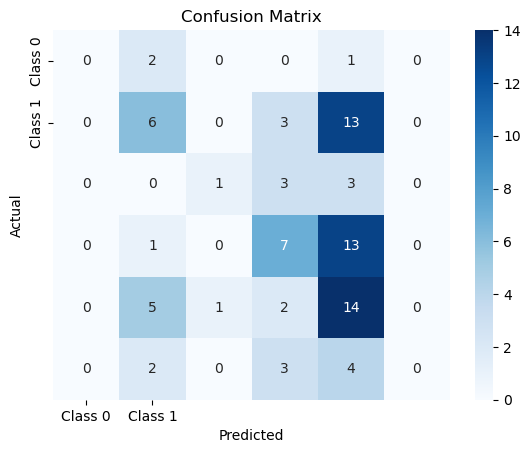

In [28]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_log_reg)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [30]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Data preprocessing and feature engineering
X = uber_data[['MILES', 'CATEGORY', 'START', 'STOP']]
y = uber_data['PURPOSE']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['MILES', 'START', 'STOP']),
        ('cat', OneHotEncoder(), ['CATEGORY'])
    ])

# Define the logistic regression pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('classifier', LogisticRegression(max_iter=1000))
])

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'classifier__C': [0.1, 1.0, 10, 100],
    'classifier__penalty': ['l1', 'l2'],
    'classifier__solver': ['liblinear', 'saga']
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Evaluate the model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'Best Logistic Regression Accuracy: {accuracy:.4f}')
print(f'Best Parameters: {grid_search.best_params_}')

C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\linear_mode

Best Logistic Regression Accuracy: 0.3413
Best Parameters: {'classifier__C': 0.1, 'classifier__penalty': 'l2', 'classifier__solver': 'liblinear'}


C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [71]:
# Random Forest
rf_clf = RandomForestClassifier(n_estimators=100, random_state=38)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

In [72]:
print(f'Random Forest Accuracy: {accuracy_rf}')

Random Forest Accuracy: 0.5714285714285714


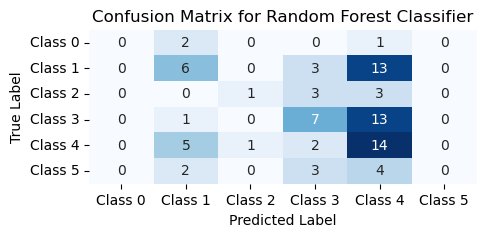

In [36]:
# Create a DataFrame for the confusion matrix
import pandas as pd
cm_df = pd.DataFrame(cm, index=['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5'],
                     columns=['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5'])

# Plot confusion matrix
plt.figure(figsize=(5, 2))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5'],
            yticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

In [26]:
# Gradient Boosting (XGBoost)
xgb_clf = XGBClassifier(eval_metric='mlogloss')
xgb_clf.fit(X_train, y_train)
y_pred_xgb = xgb_clf.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f'XGBoost Accuracy: {accuracy_xgb}')

# Support Vector Machine (SVM)
svm_clf = SVC()
svm_clf.fit(X_train, y_train)
y_pred_svm = svm_clf.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f'SVM Accuracy: {accuracy_svm}')

# Print classification reports for further evaluation
print('Logistic Regression Report:\n', classification_report(y_test, y_pred_log_reg))
print('Random Forest Report:\n', classification_report(y_test, y_pred_rf))
print('XGBoost Report:\n', classification_report(y_test, y_pred_xgb))
print('SVM Report:\n', classification_report(y_test, y_pred_svm))

XGBoost Accuracy: 0.5
SVM Accuracy: 0.2976190476190476
Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.41      0.32      0.36        22
           2       0.33      0.14      0.20         7
           3       0.40      0.38      0.39        21
           4       0.25      0.50      0.33        22
           5       0.00      0.00      0.00         9

    accuracy                           0.32        84
   macro avg       0.23      0.22      0.21        84
weighted avg       0.30      0.32      0.30        84

Random Forest Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.61      0.77      0.68        22
           2       0.29      0.29      0.29         7
           3       0.59      0.48      0.53        21
           4       0.62      0.68      0.65        22
           5       0.57  

C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Administrator\anaconda

In [27]:
# Gradient Boosting (XGBoost)
xgb_clf = XGBClassifier(eval_metric='mlogloss')
xgb_clf.fit(X_train, y_train)
y_pred_xgb = xgb_clf.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)

In [28]:
print(f'XGBoost Accuracy: {accuracy_xgb}')

XGBoost Accuracy: 0.5


In [29]:
# Support Vector Machine (SVM)
svm_clf = SVC()
svm_clf.fit(X_train, y_train)
y_pred_svm = svm_clf.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

In [30]:
print(f'SVM Accuracy: {accuracy_svm}')

SVM Accuracy: 0.2976190476190476


In [31]:
# Print classification reports for further evaluation
print('Logistic Regression Report:\n', classification_report(y_test, y_pred_log_reg))
print('Random Forest Report:\n', classification_report(y_test, y_pred_rf))
print('XGBoost Report:\n', classification_report(y_test, y_pred_xgb))
print('SVM Report:\n', classification_report(y_test, y_pred_svm))

Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.41      0.32      0.36        22
           2       0.33      0.14      0.20         7
           3       0.40      0.38      0.39        21
           4       0.25      0.50      0.33        22
           5       0.00      0.00      0.00         9

    accuracy                           0.32        84
   macro avg       0.23      0.22      0.21        84
weighted avg       0.30      0.32      0.30        84

Random Forest Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.61      0.77      0.68        22
           2       0.29      0.29      0.29         7
           3       0.59      0.48      0.53        21
           4       0.62      0.68      0.65        22
           5       0.57      0.44      0.50         9

    accuracy             

C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Administrator\anaconda

In [50]:
# Chi-square test: Test relationships between categorical variables (e.g., PURPOSE and CATEGORY)
contingency_table = pd.crosstab(uber_data['PURPOSE'], uber_data['CATEGORY'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
chi2, p

(16.790671586490742, 0.004914389618724042)

In [59]:
from scipy import stats
import pandas as pd

# Ensure data is a pandas DataFrame and CATEGORY and MILES columns exist
if 'CATEGORY' in uber_data.columns and 'MILES' in uber_data.columns:
    
    # Filter data for each category
    business_miles = uber_data[uber_data['CATEGORY'] == 'Business']['MILES'].dropna()
    personal_miles = uber_data[uber_data['CATEGORY'] == 'Personal']['MILES'].dropna()
    
    # Check if there are enough data points in both groups
    if len(business_miles) > 0 and len(personal_miles) > 0:
        # Perform the T-test
        t_stat, p_value = stats.ttest_ind(business_miles, personal_miles)
        print(f"T-statistic: {t_stat}, P-value: {p_value}")
    else:
        print("Not enough data points in one or both groups for the T-test.")
else:
    print("Data does not contain required columns: CATEGORY and MILES.")


Not enough data points in one or both groups for the T-test.


In [26]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the logistic regression model with cross-validation for hyperparameter tuning
log_reg = LogisticRegression(max_iter=300)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Best parameters from grid search
best_params = grid_search.best_params_
print(f"Best parameters found: {best_params}")

# Train the final model using the best parameters
log_reg_best = LogisticRegression(**best_params, max_iter=300)
log_reg_best.fit(X_train_scaled, y_train)

# Make predictions
y_pred_log_reg = log_reg_best.predict(X_test_scaled)

# Calculate accuracy
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print(f"Accuracy: {accuracy_log_reg}")

C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\linear_mode

Best parameters found: {'C': 10, 'penalty': 'l1', 'solver': 'saga'}
Accuracy: 0.32142857142857145


C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans